# Report Visuals (Share)

## Purpose

This notebook creates **presentation-ready visuals** to communicate key insights
from the Amazon Bestselling Books analysis to non-technical stakeholders.

All visuals:
- Are derived from the cleaned dataset
- Introduce no new analysis
- Are saved as PNG files in `/reports`
- Will be used in the final README and recommendations

This notebook focuses purely on **communication**, not exploration.


In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid")

# Resolve repo root robustly
here = Path.cwd()
repo_root = next((p for p in [here, *here.parents] if (p / "requirements.txt").exists()), None)

if repo_root is None:
    raise FileNotFoundError("Repo root not found.")

reports_dir = repo_root / "reports"
reports_dir.mkdir(parents=True, exist_ok=True)

clean_path = repo_root / "data_cleaned" / "amazon_books_cleaned.csv"
df = pd.read_csv(clean_path)

df.head()


,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## 1️⃣ Genre share over time

This chart shows how the proportion of Fiction vs Non-Fiction books in Amazon’s
Top 50 Bestsellers has changed over time.


<Figure size 800x500 with 0 Axes>

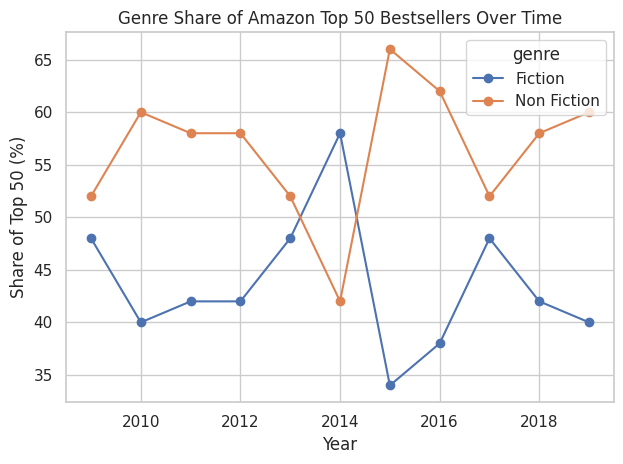

In [2]:
genre_year = (
    df.groupby(["year", "genre"])
      .size()
      .reset_index(name="count")
)

genre_year["share_pct"] = (
    genre_year.groupby("year")["count"]
              .transform(lambda s: (s / s.sum()) * 100)
)

pivot = genre_year.pivot(index="year", columns="genre", values="share_pct")

plt.figure(figsize=(8, 5))
pivot.plot(marker="o")
plt.title("Genre Share of Amazon Top 50 Bestsellers Over Time")
plt.xlabel("Year")
plt.ylabel("Share of Top 50 (%)")
plt.tight_layout()

plt.savefig(reports_dir / "genre_share_over_time.png", dpi=150)
plt.show()


## 2️⃣ Overall genre share

This chart displays the overall composition of Amazon’s Top 50 Bestsellers by genre.


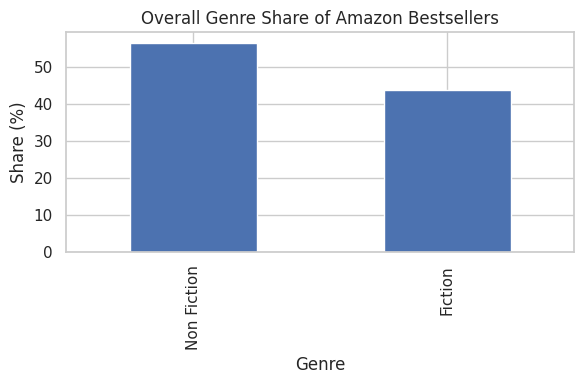

In [3]:
genre_share = (
    df["genre"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
)

plt.figure(figsize=(6, 4))
genre_share.plot(kind="bar")
plt.title("Overall Genre Share of Amazon Bestsellers")
plt.xlabel("Genre")
plt.ylabel("Share (%)")
plt.tight_layout()

plt.savefig(reports_dir / "overall_genre_share.png", dpi=150)
plt.show()


## 3️⃣ Price distribution by genre

This chart compares the typical pricing levels of bestselling books across genres.


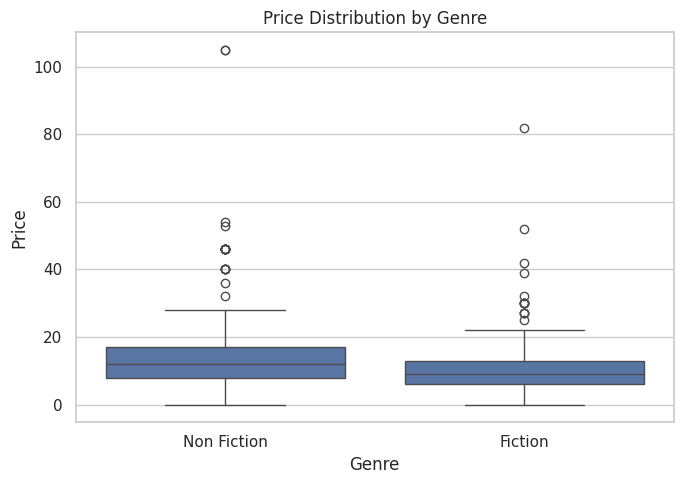

In [4]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="genre", y="price")
plt.title("Price Distribution by Genre")
plt.xlabel("Genre")
plt.ylabel("Price")
plt.tight_layout()

plt.savefig(reports_dir / "price_distribution_by_genre.png", dpi=150)
plt.show()


## 4️⃣ User rating vs review volume

This chart explores the relationship between customer satisfaction (ratings)
and popularity (number of reviews).


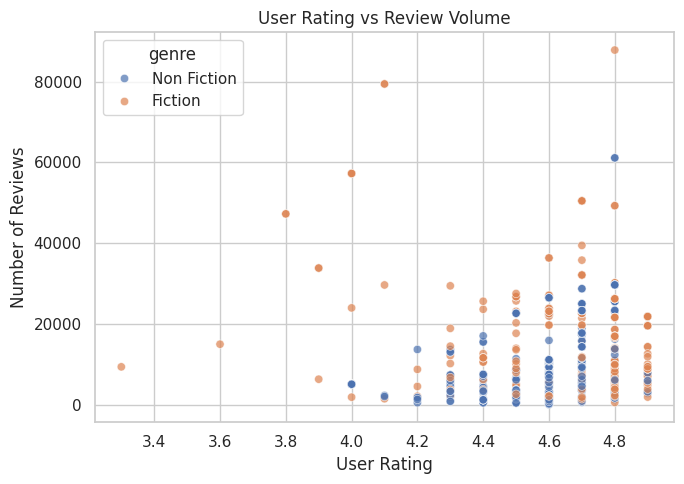

In [5]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x="user_rating",
    y="reviews",
    hue="genre",
    alpha=0.7
)
plt.title("User Rating vs Review Volume")
plt.xlabel("User Rating")
plt.ylabel("Number of Reviews")
plt.tight_layout()

plt.savefig(reports_dir / "rating_vs_reviews.png", dpi=150)
plt.show()


## 5️⃣ Authors with repeated bestseller appearances

This chart highlights authors who appear most frequently in Amazon’s Top 50
Bestseller lists across multiple years.


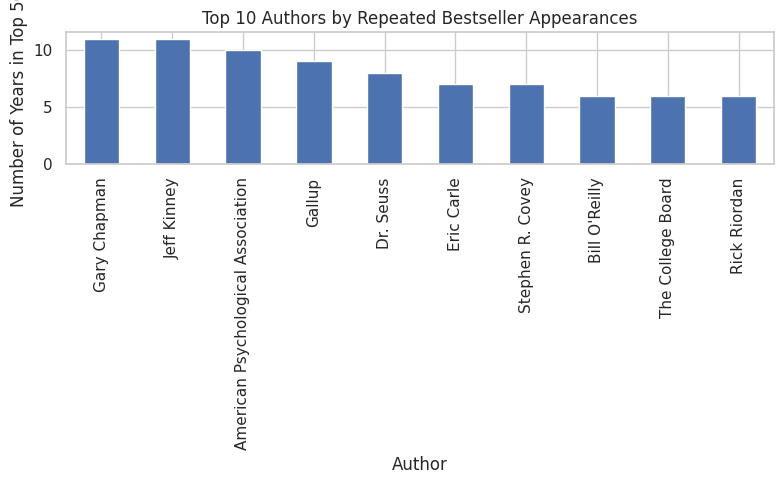

In [6]:
author_repeats = (
    df.groupby("author")
      .agg(appearances=("year", "nunique"))
      .sort_values("appearances", ascending=False)
      .head(10)
)

plt.figure(figsize=(8, 5))
author_repeats["appearances"].plot(kind="bar")
plt.title("Top 10 Authors by Repeated Bestseller Appearances")
plt.xlabel("Author")
plt.ylabel("Number of Years in Top 50")
plt.tight_layout()

plt.savefig(reports_dir / "top_repeat_authors.png", dpi=150)
plt.show()


## End of Notebook 04

All report-ready visuals have been saved to the `/reports` directory.

These visuals will be used in:
- Notebook 05 (Recommendations)
- The final project README
